# Unix command 
mkdir cleaned_data
# Loop through all bd*.txt files except bd1.txt
for file in bd{2..78}.txt; do
    # Remove the header using tail and save the result to a new file in the new_folder
    tail -n +2 "$file" > "new_folder/$file"
done
cp bd1.txt combined.txt
#comined all the bd.txt files and saved into new combined.txt
for file in bd*.txt; do
    if [ "$file" != "bd1.txt" ]; then
        tail -n +2 "$file" >> combined.txt
    fi
done

# R script to filter the data with only the targeted 16 species and removing all the other rows.
species_to_keep <- c("Sphyraena putnamae", "Scomberomorus commerson", "Scomberoides tol",
  "Saurida tumbil", "Rhabdosargus sarba", "Rastrelliger kanagurta",
  "Psettodes erumei", "Platycephalus indicus", "Nemipterus japonicus",
  "Megalaspis cordyla", "Lethrinus nebulosus", "Epinephelus chlorostigma",
  "Decapterus russelli", "Chirocentrus dorab", "Chanos chanos", "Argyrops spinifer")
filtered_df <- barcode %>% filter(species_name %in% species_to_keep)
write.table(filtered_df, "filtered_combined.txt", sep="\t", quote=FALSE, row.names=FALSE)


In [55]:
import pandas as pd

# Define the file path
file_path = "~/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Read the TSV file into a pandas 
try:
    barcode_2 = pd.read_csv(file_path, sep="\t", encoding='utf-8')
except UnicodeDecodeError:
    barcode_2 = pd.read_csv(file_path, sep="\t", encoding='latin-1')

# Display the column names and the first few rows of the DataFrame
print("Column Names:")
print(barcode_2.columns)
print("\nFirst few rows:")
print(barcode_2.head())
(barcode_2)


Column Names:
Index(['processid', 'sampleid', 'recordID', 'catalognum', 'fieldnum',
       'institution_storing', 'collection_code', 'bin_uri', 'phylum_taxID',
       'phylum_name', 'class_taxID', 'class_name', 'order_taxID', 'order_name',
       'family_taxID', 'family_name', 'subfamily_taxID', 'subfamily_name',
       'genus_taxID', 'genus_name', 'species_taxID', 'species_name',
       'subspecies_taxID', 'subspecies_name', 'identification_provided_by',
       'identification_method', 'identification_reference', 'tax_note',
       'voucher_status', 'tissue_type', 'collection_event_id', 'collectors',
       'collectiondate_start', 'collectiondate_end', 'collectiontime',
       'collection_note', 'site_code', 'sampling_protocol', 'lifestage', 'sex',
       'reproduction', 'habitat', 'associated_specimens', 'associated_taxa',
       'extrainfo', 'notes', 'lat', 'lon', 'coord_source', 'coord_accuracy',
       'elev', 'depth', 'elev_accuracy', 'depth_accuracy', 'country',
       'province

,processid,sampleid,recordID,catalognum,fieldnum,institution_storing,collection_code,bin_uri,phylum_taxID,phylum_name,...,genbank_accession,nucleotides,trace_ids,trace_names,trace_links,run_dates,sequencing_centers,directions,seq_primers,marker_codes
0,NNPF014-10,NPPF1014,1384834,NaN,1014,University of Tehran,NaN,BOLD:ABX5306,18,Chordata,...,HQ149920,TTATCTAGTATTTGGTGCTTGAGCCGGAATAGTAGGAACTGCCTTA...,2289713,14-M13F-e.ab1,http://trace.boldsystems.org/traceIO/bold.org/...,2010-03-24 20:50:53,"Macrogen, Korea",F,M13F,COI-5P
1,NNPF018-10,NPPF1018,1384838,NaN,1018,University of Tehran,NaN,BOLD:AAB5513,18,Chordata,...,HQ149943,CTATCTAGTATTTGGTGCATGAGCTGGAATAGTTGGCACAGCCCTA...,2289717,18-M13F-e.ab1,http://trace.boldsystems.org/traceIO/bold.org/...,2010-01-23 01:25:23,"Macrogen, Korea",F,M13F,COI-5P
2,NNPF048-10,NPPF1048,1384868,NaN,1048,University of Tehran,NaN,BOLD:AAB3720,18,Chordata,...,HQ149794,------TGTATTTGGTGCTTGGGCCGGAATAGTAGGGACTGCCCTA...,2289931|2289747,"NNPF048-10[C_FishF1t1,C_FishR1t1]_R.ab1|48-M13...",http://trace.boldsystems.org/traceIO/bold.org/...,2010-07-01 09:56:34|2010-01-22 19:57:39,"Centre for Biodiversity Genomics|Macrogen, Korea",R|F,M13R|M13F,COI-5P|COI-5P
3,NNPF050-10,NPPF1050,1384870,NaN,1050,University of Tehran,NaN,BOLD:AAB2694,18,Chordata,...,HQ149958,CTACCTACTATTTGGCGCCTGGGCTGGGATGGTAGGTACAGCTCTA...,2289933|2289749,"NNPF050-10[C_FishF1t1,C_FishR1t1]_R.ab1|50-M13...",http://trace.boldsystems.org/traceIO/bold.org/...,2010-07-01 09:56:34|2010-01-22 21:46:47,"Centre for Biodiversity Genomics|Macrogen, Korea",R|F,M13R|M13F,COI-5P|COI-5P
4,NNPF056-10,NPPF1056,1384876,NaN,1056,University of Tehran,NaN,BOLD:AAB5271,18,Chordata,...,HQ149881,---------ATTTGGTGCTTGAGCCGGAATAGTGGGGACAGCTTTA...,2289939|2289755,"NNPF056-10[C_FishF1t1,C_FishR1t1]_R.ab1|56-M13...",http://trace.boldsystems.org/traceIO/bold.org/...,2010-07-01 09:56:34|2010-02-17 02:50:09,"Centre for Biodiversity Genomics|Macrogen, Korea",R|F,M13R|M13F,COI-5P|COI-5P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,NNPF092-10,NPPF1092,1384912,NaN,1092,University of Tehran,NaN,BOLD:ACK8065,18,Chordata,...,HQ149826,------AATCTTCGGTGCCTGGGCCGGAATGGTGGGCACAGCCTTG...,2289790,92-M13F-e.ab1,http://trace.boldsystems.org/traceIO/bold.org/...,2010-02-19 19:41:56,"Macrogen, Korea",F,M13F,COI-5P
1473,NNPF107-10,NPPF1107,1384927,NaN,1107,University of Tehran,NaN,BOLD:ACK8065,18,Chordata,...,HQ149825,------AATCTTCGGTGCCTGGGCCGGAATGGTGGGCACAGCCTTG...,2289804,107-M13F-e.ab1,http://trace.boldsystems.org/traceIO/bold.org/...,2010-02-19 13:48:12,"Macrogen, Korea",F,M13F,COI-5P
1474,PHILA1673-16,PHIL-036,6838431,USNM:FISH:437646,PHIL-036,"Smithsonian Institution, National Museum of Na...",NaN,BOLD:ACK8065,18,Chordata,...,OQ387407,CCTGTACATAATCTTCGGTGCCTGGGCCGGAATGGTGGGCACAGCC...,10228683|10228682,0189602164-01R.ab1|0189602164-01F.ab1,http://trace.boldsystems.org/traceIO/bold.org/...,2016-03-09 17:44:18|2016-03-09 13:51:46,"Smithsonian Institution, National Museum of Na...",r|f,Fish-BCH|Fish-BCL,COI-5P|COI-5P
1475,PHILA2704-18,PHISH-513,8539327,USNM:FISH:443353,PHISH-513,"Smithsonian Institution, National Museum of Na...",NaN,BOLD:ACK8065,18,Chordata,...,OQ385566,CCTGTACATAATCTTCGGTGCCTGGGCCGGAATGGTGGGCACAGCC...,10480781|10480287,0233137898-01R.ab1|0233137898-01F.ab1,http://trace.boldsystems.org/traceIO/bold.org/...,2018-01-17 08:41:38|2018-01-17 10:29:08,"Smithsonian Institution, National Museum of Na...",r|f,Fish-BCH|Fish-BCL,COI-5P|COI-5P


In [56]:
import pandas as pd


file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_2 = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Count the number of rows for the target species
target_species = "Sphyraena putnamae"
num_rows = len(barcode_2[barcode_2['species_name'] == target_species])

print(f"Number of rows for species '{target_species}': {num_rows}")



Number of rows for species 'Sphyraena putnamae': 75


In [57]:
import pandas as pd

file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_2 = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Count the number of rows for the target species
target_species = "Argyrops spinifer"
num_rows = len(barcode_2[barcode_2['species_name'] == target_species])

print(f"Number of rows for species '{target_species}': {num_rows}")

Number of rows for species 'Argyrops spinifer': 44


In [59]:
from Bio.Seq import Seq

file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species name
target_species = "Sphyraena putnamae"

# Initialize a list to store sequences of the target species
target_sequences = []

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    for line in file:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        nucleotides = cols[71]  
        if species_name == target_species:
            target_sequences.append(Seq(nucleotides))

# Print the nucleotide sequences of the target species
for seq in target_sequences:
    print(seq)


CTACCTACTATTTGGCGCCTGGGCTGGGATGGTAGGTACAGCTCTAAGCCTACTTATTCGAGCCGAACTTAGTCAACCGGGCTCTCTCTTAGGAGACGACCAAATTTATAATGTTATCGTAACAGCACACGCCTTTGTAATAATCTTTTTTATGGTAATACCCATTATGATTGGGGGCTTTGGGAACTGACTTATTCCCCTAATAATTGGCGCTCCAGACATAGCATTCCCCCGAATAAATAATATAAGCTTTTGACTACTCCCCCCTTCCTTTCTCTTACTCCTTTCTTCTTCGGCTGTAGAAGCGGGGGCCGGGACAGGATGGACAGTTTATCCTCCCTTAGCTGGAAATTTGGCCCATGCAGGAGCATCCGTCGACCTAACCATTTTCTCCCTTCACCTGGCAGGTATTTCTTCAATCCTAGGGGCTATTAATTTTATTACCACTATTATTAACATGAAACCAGCGGCGACTTCAATGTACCAAATTCCTCTGTTCGTTTGGGCTGTACTAATCACTGCCGTTCTCCTTCTCCTTTCACTCCCTGTCTTAGCTGCTGGTATTACAATGCTCTTGACAGATCGAAATCTAAACACCGCCTTCTTTGACCCAGCAGGAGGAGGAGACCCCATTCTGTACCAGCACTTA
GCTCTAAGCCTACTTATTCGAGCCGAACTTAGTCAACCGGGCTCTCTCTTAGGAGACGACCAAATTTATAATGTTATCGTAACAGCACACGCCTTTGTAATAATCTTTTTTATGGTAATACCCATTATGATTGGGGGCTTTGGGAACTGACTTATTCCCCTAATAATTGGCGCTCCAGACATAGCATTCCCCCGAATAAATAATATAAGCTTTTGACTACTCCCCCCTTCCTTTCTCTTACTCCTTTCTTCTTCGGCTGTAGAAGCGGGAGCCGGGACAGGATGGACAGTTTATCCTCCCTTAGCTGGAAATTTGGCCCATGCAGGAGCATCCGTCGACCTAACCATTTT

In [60]:
from Bio.Seq import Seq

# Define the file path
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species name
target_species = "Sphyraena putnamae"

# Initialize a list to store sequences of the target species
target_sequences = []

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    for line in file:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        nucleotides = cols[71]  
        if species_name == target_species:
            target_sequences.append(Seq(nucleotides))

# Print the sequences of the target species
for seq in target_sequences:
    print(seq)


CTACCTACTATTTGGCGCCTGGGCTGGGATGGTAGGTACAGCTCTAAGCCTACTTATTCGAGCCGAACTTAGTCAACCGGGCTCTCTCTTAGGAGACGACCAAATTTATAATGTTATCGTAACAGCACACGCCTTTGTAATAATCTTTTTTATGGTAATACCCATTATGATTGGGGGCTTTGGGAACTGACTTATTCCCCTAATAATTGGCGCTCCAGACATAGCATTCCCCCGAATAAATAATATAAGCTTTTGACTACTCCCCCCTTCCTTTCTCTTACTCCTTTCTTCTTCGGCTGTAGAAGCGGGGGCCGGGACAGGATGGACAGTTTATCCTCCCTTAGCTGGAAATTTGGCCCATGCAGGAGCATCCGTCGACCTAACCATTTTCTCCCTTCACCTGGCAGGTATTTCTTCAATCCTAGGGGCTATTAATTTTATTACCACTATTATTAACATGAAACCAGCGGCGACTTCAATGTACCAAATTCCTCTGTTCGTTTGGGCTGTACTAATCACTGCCGTTCTCCTTCTCCTTTCACTCCCTGTCTTAGCTGCTGGTATTACAATGCTCTTGACAGATCGAAATCTAAACACCGCCTTCTTTGACCCAGCAGGAGGAGGAGACCCCATTCTGTACCAGCACTTA
GCTCTAAGCCTACTTATTCGAGCCGAACTTAGTCAACCGGGCTCTCTCTTAGGAGACGACCAAATTTATAATGTTATCGTAACAGCACACGCCTTTGTAATAATCTTTTTTATGGTAATACCCATTATGATTGGGGGCTTTGGGAACTGACTTATTCCCCTAATAATTGGCGCTCCAGACATAGCATTCCCCCGAATAAATAATATAAGCTTTTGACTACTCCCCCCTTCCTTTCTCTTACTCCTTTCTTCTTCGGCTGTAGAAGCGGGAGCCGGGACAGGATGGACAGTTTATCCTCCCTTAGCTGGAAATTTGGCCCATGCAGGAGCATCCGTCGACCTAACCATTTT

In [61]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations

# Define the file path
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species name
target_species = "Sphyraena putnamae"

# Initialize a list to store sequences of the target species
target_sequences = []

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    for line in file:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        nucleotides = cols[71]  
        if species_name == target_species:
            target_sequences.append(Seq(nucleotides))

# Calculate genetic distances among sequences of the target species
if target_sequences:
    aligner = PairwiseAligner()
    aligner.mode = 'global'  # Use global alignment
    aligner.match_score = 1  # Match score
    aligner.mismatch_score = -1  # Mismatch score
    aligner.open_gap_score = -1  # Open gap penalty
    aligner.extend_gap_score = -1  # Extend gap penalty

    num_sequences = len(target_sequences)
    total_dist = 0
    dists = []

    for seq1, seq2 in combinations(target_sequences, 2):
        alignments = aligner.align(seq1, seq2)
        top_alignment = alignments[0]
        aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
        aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment
        
        similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
        genetic_dist = 1 - similarity
        
        total_dist += genetic_dist
        dists.append(genetic_dist)

    mean_dist = total_dist / (num_sequences * (num_sequences - 1) / 2)
    sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

    print(f"Mean genetic distance: {mean_dist}")
    print(f"Standard deviation of genetic distance: {sd_dist}")
else:
    print(f"No sequences found for species '{target_species}'.")



Mean genetic distance: 0.10307537627218422
Standard deviation of genetic distance: 0.12559073714113425


In [15]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations


file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species
species_distances = {}

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    # Read the lines from the file
    lines = file.readlines()

# Parse sequences for each target species
for target_species in target_species_list:
    # Initialize a list to store sequences of the target species
    target_sequences = []

    for line in lines:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        nucleotides = cols[71]  
        if species_name == target_species:
            target_sequences.append(Seq(nucleotides))

    # Calculate genetic distances among sequences of the target species
    if target_sequences:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        num_sequences = len(target_sequences)
        total_dist = 0
        dists = []

        for seq1, seq2 in combinations(target_sequences, 2):
            alignments = aligner.align(seq1, seq2)
            top_alignment = alignments[0]
            aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment
            
            similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
            genetic_dist = 1 - similarity
            
            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / (num_sequences * (num_sequences - 1) / 2)
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances[target_species] = (mean_dist, sd_dist)
    else:
        species_distances[target_species] = (None, None)  # No sequences found

# Print the mean and standard deviation for each species
for species, (mean, sd) in species_distances.items():
    if mean is not None and sd is not None:
        print(f"Species: {species}")
        print(f"Mean global genetic distance: {mean}")
        print(f"Standard deviation of global genetic distance: {sd}")
        print()
    else:
        print(f"No sequences found for species '{species}'.")


Species: Sphyraena putnamae
Mean global genetic distance: 0.10307537627218422
Standard deviation of global genetic distance: 0.12559073714113425

Species: Scomberomorus commerson
Mean global genetic distance: 0.062349763592236915
Standard deviation of global genetic distance: 0.04083434478569615

Species: Scomberoides tol
Mean global genetic distance: 0.13130674403464304
Standard deviation of global genetic distance: 0.15831962287384294

Species: Saurida tumbil
Mean global genetic distance: 0.07641945964782686
Standard deviation of global genetic distance: 0.06927054845047795

Species: Rhabdosargus sarba
Mean global genetic distance: 0.017203135847203645
Standard deviation of global genetic distance: 0.018975029074822805

Species: Rastrelliger kanagurta
Mean global genetic distance: 0.04718118796846214
Standard deviation of global genetic distance: 0.04367179533919639

Species: Psettodes erumei
Mean global genetic distance: 0.23320596737659827
Standard deviation of global genetic dista

In [63]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from collections import defaultdict


file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the genetic distance threshold for clustering MOTUs
threshold = 0.1  # Adjust this threshold as needed

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store MOTUs for each species
species_motus = defaultdict(list)

# Define the PairwiseAligner
aligner = PairwiseAligner()
aligner.mode = 'global'  # Use global alignment
aligner.match_score = 1  # Match score
aligner.mismatch_score = -1  # Mismatch score
aligner.open_gap_score = -1  # Open gap penalty
aligner.extend_gap_score = -1  # Extend gap penalty

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    # Read the lines from the file
    lines = file.readlines()

# Parse sequences and cluster MOTUs for each target species
for line in lines:
    cols = line.strip().split("\t")
    species_name = cols[21]  
    nucleotides = cols[71]  )

    if species_name in target_species_list:
        # Check if any MOTU contains similar sequences
        found_motu = False
        for motu_seqs in species_motus[species_name]:
            for seq in motu_seqs:
                alignments = aligner.align(Seq(seq), Seq(nucleotides))
                top_alignment = alignments[0]
                aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
                aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment
                similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
                if similarity >= threshold:
                    motu_seqs.append(nucleotides)
                    found_motu = True
                    break
            if found_motu:
                break

        if not found_motu:
            species_motus[species_name].append([nucleotides])

# Count the number of MOTUs for each species
species_motu_counts = {species: len(motus) for species, motus in species_motus.items()}

# Print the number of MOTUs for each species
for species, motu_count in species_motu_counts.items():
    print(f"Species: {species}")
    print(f"Number of MOTUs: {motu_count}")
    print()



Species: Rhabdosargus sarba
Number of MOTUs: 1

Species: Scomberomorus commerson
Number of MOTUs: 1

Species: Argyrops spinifer
Number of MOTUs: 1

Species: Sphyraena putnamae
Number of MOTUs: 1

Species: Megalaspis cordyla
Number of MOTUs: 1

Species: Saurida tumbil
Number of MOTUs: 1

Species: Decapterus russelli
Number of MOTUs: 1

Species: Chirocentrus dorab
Number of MOTUs: 1

Species: Platycephalus indicus
Number of MOTUs: 1

Species: Lethrinus nebulosus
Number of MOTUs: 1

Species: Epinephelus chlorostigma
Number of MOTUs: 1

Species: Scomberoides tol
Number of MOTUs: 1

Species: Rastrelliger kanagurta
Number of MOTUs: 1

Species: Chanos chanos
Number of MOTUs: 1

Species: Psettodes erumei
Number of MOTUs: 1

Species: Nemipterus japonicus
Number of MOTUs: 1



In [64]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations


file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species within Iran
species_distances_iran = {}

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    # Read the lines from the file
    lines = file.readlines()

# Parse sequences for each target species within Iran
for target_species in target_species_list:
    # Initialize a list to store sequences of the target species within Iran
    target_sequences_iran = []

    for line in lines:
        cols = line.strip().split("\t")
        species_name = cols[21]  # Assuming species name is in column 22 (0-indexed)
        nucleotides = cols[71]  # Assuming nucleotides are in column 72 (0-indexed)
        country = cols[54]  # Assuming country is in column 6 (0-indexed)

        if species_name == target_species and country == "Iran":
            target_sequences_iran.append(Seq(nucleotides))

    # Calculate genetic distances among sequences of the target species within Iran
    if target_sequences_iran:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        num_sequences_iran = len(target_sequences_iran)
        total_dist_iran = 0
        dists_iran = []

        for seq1, seq2 in combinations(target_sequences_iran, 2):
            alignments = aligner.align(seq1, seq2)
            top_alignment = alignments[0]
            aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment
            
            similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
            genetic_dist = 1 - similarity
            
            total_dist_iran += genetic_dist
            dists_iran.append(genetic_dist)

        mean_dist_iran = total_dist_iran / (num_sequences_iran * (num_sequences_iran - 1) / 2)
        sd_dist_iran = (sum((dist - mean_dist_iran) ** 2 for dist in dists_iran) / len(dists_iran)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_iran[target_species] = (mean_dist_iran, sd_dist_iran)
    else:
        species_distances_iran[target_species] = (None, None)  # No sequences found within Iran

# Print the mean and standard deviation for each species within Iran
for species, (mean_iran, sd_iran) in species_distances_iran.items():
    if mean_iran is not None and sd_iran is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance within Iran: {mean_iran}")
        print(f"Standard deviation of genetic distance within Iran: {sd_iran}")
        print()
    else:
        print(f"No sequences found for species '{species}' within Iran.")


Species: Sphyraena putnamae
Mean genetic distance within Iran: 0.0
Standard deviation of genetic distance within Iran: 0.0

Species: Scomberomorus commerson
Mean genetic distance within Iran: 0.07190549563430919
Standard deviation of genetic distance within Iran: 0.050844863567599714

Species: Scomberoides tol
Mean genetic distance within Iran: 0.0010272213662044412
Standard deviation of genetic distance within Iran: 0.0007263551938228702

Species: Saurida tumbil
Mean genetic distance within Iran: 0.034514637904468425
Standard deviation of genetic distance within Iran: 0.04561418086944975

Species: Rhabdosargus sarba
Mean genetic distance within Iran: 0.017203135847203645
Standard deviation of genetic distance within Iran: 0.018975029074822805

Species: Rastrelliger kanagurta
Mean genetic distance within Iran: 0.02132242240757913
Standard deviation of genetic distance within Iran: 0.02466404267280566

Species: Psettodes erumei
Mean genetic distance within Iran: 0.0
Standard deviation o

In [65]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations


file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species
species_distances = {}

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    # Read the lines from the file
    lines = file.readlines()

# Parse sequences for each target species within India (column 54)
for target_species in target_species_list:
    # Initialize a list to store sequences of the target species within India
    target_sequences_india = []

    for line in lines:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        country = cols[54]  
        nucleotides = cols[71]  
        if species_name == target_species and country == "India":
            target_sequences_india.append(Seq(nucleotides))

    # Calculate genetic distances among sequences of the target species within India
    if target_sequences_india:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        num_sequences = len(target_sequences_india)
        total_dist = 0
        dists = []

        for seq1, seq2 in combinations(target_sequences_india, 2):
            alignments = aligner.align(seq1, seq2)
            top_alignment = alignments[0]
            aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment
            
            similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
            genetic_dist = 1 - similarity
            
            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / (num_sequences * (num_sequences - 1) / 2)
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances[target_species] = (mean_dist, sd_dist)
    else:
        species_distances[target_species] = (None, None)  # No sequences found within India

# Print the mean and standard deviation for each species within India
for species, (mean, sd) in species_distances.items():
    if mean is not None and sd is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance within India: {mean}")
        print(f"Standard deviation of genetic distance within India: {sd}")
        print()
    else:
        print(f"No sequences found for species '{species}' within India.")


Species: Sphyraena putnamae
Mean genetic distance within India: 0.199923217412338
Standard deviation of genetic distance within India: 0.08081185511551235

Species: Scomberomorus commerson
Mean genetic distance within India: 0.0882936381100103
Standard deviation of genetic distance within India: 0.061515363148620626

Species: Scomberoides tol
Mean genetic distance within India: 0.04636785162287482
Standard deviation of genetic distance within India: 0.0

Species: Saurida tumbil
Mean genetic distance within India: 0.07865908556609243
Standard deviation of genetic distance within India: 0.08808742172735091

No sequences found for species 'Rhabdosargus sarba' within India.
Species: Rastrelliger kanagurta
Mean genetic distance within India: 0.036484825660016346
Standard deviation of genetic distance within India: 0.037508738403559685

Species: Psettodes erumei
Mean genetic distance within India: 0.06524050080142803
Standard deviation of genetic distance within India: 0.04859141716755365

S

In [66]:
import pandas as pd

# Define the file path
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_2 = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter the DataFrame for Argyrops spinifer in India
argyrops_spinifer_india = barcode_2[(barcode_2['species_name'] == 'Sphyraena putnamae') & (barcode_2['country'] == 'India')]

# Count the number of rows
num_argyrops_spinifer_india = len(argyrops_spinifer_india)

print(f"Number of rows for species 'Argyrops spinifer' in India: {num_argyrops_spinifer_india}")


Number of rows for species 'Argyrops spinifer' in India: 3


In [67]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations

# Define the file path
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species within China
species_distances_china = {}

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    # Read the lines from the file
    lines = file.readlines()

# Parse sequences for each target species within China
for target_species in target_species_list:
    # Initialize a list to store sequences of the target species within China
    target_sequences_china = []

    for line in lines:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        nucleotides = cols[71]  
        country = cols[54]  

        if species_name == target_species and country == "China":
            target_sequences_china.append(Seq(nucleotides))

    # Calculate genetic distances among sequences of the target species within China
    if target_sequences_china:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        num_sequences_china = len(target_sequences_china)
        total_dist_china = 0
        dists_china = []

        for seq1, seq2 in combinations(target_sequences_china, 2):
            alignments = aligner.align(seq1, seq2)
            top_alignment = alignments[0]
            aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment
            
            similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
            genetic_dist = 1 - similarity
            
            total_dist_china += genetic_dist
            dists_china.append(genetic_dist)

        mean_dist_china = total_dist_china / (num_sequences_china * (num_sequences_china - 1) / 2)
        sd_dist_china = (sum((dist - mean_dist_china) ** 2 for dist in dists_china) / len(dists_china)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_china[target_species] = (mean_dist_china, sd_dist_china)
    else:
        species_distances_china[target_species] = (None, None)  # No sequences found within China

# Print the mean and standard deviation for each species within China
for species, (mean_china, sd_china) in species_distances_china.items():
    if mean_china is not None and sd_china is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance within China: {mean_china}")
        print(f"Standard deviation of genetic distance within China: {sd_china}")
        print()
    else:
        print(f"No sequences found for species '{species}' within China.")


Species: Sphyraena putnamae
Mean genetic distance within China: 0.03509249320126919
Standard deviation of genetic distance within China: 0.06940244726242684

No sequences found for species 'Scomberomorus commerson' within China.
Species: Scomberoides tol
Mean genetic distance within China: 0.19913422059798927
Standard deviation of genetic distance within China: 0.1878284697550346

No sequences found for species 'Saurida tumbil' within China.
No sequences found for species 'Rhabdosargus sarba' within China.
Species: Rastrelliger kanagurta
Mean genetic distance within China: 0.03991083769884157
Standard deviation of genetic distance within China: 0.05021387362709507

Species: Psettodes erumei
Mean genetic distance within China: 0.0561594202898551
Standard deviation of genetic distance within China: 0.0

No sequences found for species 'Platycephalus indicus' within China.
No sequences found for species 'Nemipterus japonicus' within China.
Species: Megalaspis cordyla
Mean genetic distance 

In [68]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations

# Define the file path
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species within Australia
species_distances_australia = {}

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    # Read the lines from the file
    lines = file.readlines()

# Parse sequences for each target species within Australia
for target_species in target_species_list:
    # Initialize a list to store sequences of the target species within Australia
    target_sequences_australia = []

    for line in lines:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        nucleotides = cols[71]  
        country = cols[54]  
        if species_name == target_species and country == "Australia":
            target_sequences_australia.append(Seq(nucleotides))

    # Calculate genetic distances among sequences of the target species within Australia
    if target_sequences_australia:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        num_sequences_australia = len(target_sequences_australia)
        total_dist_australia = 0
        dists_australia = []

        for seq1, seq2 in combinations(target_sequences_australia, 2):
            alignments = aligner.align(seq1, seq2)
            top_alignment = alignments[0]
            aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
            genetic_dist = 1 - similarity

            total_dist_australia += genetic_dist
            dists_australia.append(genetic_dist)

        if num_sequences_australia > 1:
            mean_dist_australia = total_dist_australia / (num_sequences_australia * (num_sequences_australia - 1) / 2)
            sd_dist_australia = (sum((dist - mean_dist_australia) ** 2 for dist in dists_australia) / len(dists_australia)) ** 0.5

            # Store mean and standard deviation in the dictionary
            species_distances_australia[target_species] = (mean_dist_australia, sd_dist_australia)
        else:
            species_distances_australia[target_species] = (None, None)  # Only one sequence found within Australia
    else:
        species_distances_australia[target_species] = (None, None)  # No sequences found within Australia

# Print the mean and standard deviation for each species within Australia
for species, (mean_australia, sd_australia) in species_distances_australia.items():
    if mean_australia is not None and sd_australia is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance within Australia: {mean_australia}")
        print(f"Standard deviation of genetic distance within Australia: {sd_australia}")
        print()
    else:
        print(f"No sequences found for species '{species}' within Australia.")


Species: Sphyraena putnamae
Mean genetic distance within Australia: 0.04823488487105381
Standard deviation of genetic distance within Australia: 0.059163028078918094

No sequences found for species 'Scomberomorus commerson' within Australia.
Species: Scomberoides tol
Mean genetic distance within Australia: 0.0015267175572518665
Standard deviation of genetic distance within Australia: 0.0

No sequences found for species 'Saurida tumbil' within Australia.
No sequences found for species 'Rhabdosargus sarba' within Australia.
No sequences found for species 'Rastrelliger kanagurta' within Australia.
Species: Psettodes erumei
Mean genetic distance within Australia: 0.01255250848353425
Standard deviation of genetic distance within Australia: 0.011397224604795923

No sequences found for species 'Platycephalus indicus' within Australia.
No sequences found for species 'Nemipterus japonicus' within Australia.
No sequences found for species 'Megalaspis cordyla' within Australia.
No sequences found

In [69]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations

# Define the file path
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species within South Africa
species_distances_south_africa = {}

# Open the TSV file with Latin-1 encoding
with open(file_path, "r", encoding="latin1") as file:
    # Read the lines from the file
    lines = file.readlines()

# Parse sequences for each target species within South Africa
for target_species in target_species_list:
    # Initialize a list to store sequences of the target species within South Africa
    target_sequences_south_africa = []

    for line in lines:
        cols = line.strip().split("\t")
        species_name = cols[21]  
        nucleotides = cols[71]  
        country = cols[54]  

        if species_name == target_species and country == "South Africa":
            target_sequences_south_africa.append(Seq(nucleotides))

    # Calculate genetic distances among sequences of the target species within South Africa
    if target_sequences_south_africa:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        num_sequences_south_africa = len(target_sequences_south_africa)
        total_dist_south_africa = 0
        dists_south_africa = []

        for seq1, seq2 in combinations(target_sequences_south_africa, 2):
            alignments = aligner.align(seq1, seq2)
            top_alignment = alignments[0]
            aligned_seq1 = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq2 = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2)) / len(aligned_seq1)
            genetic_dist = 1 - similarity

            total_dist_south_africa += genetic_dist
            dists_south_africa.append(genetic_dist)

        if num_sequences_south_africa > 1:
            mean_dist_south_africa = total_dist_south_africa / (num_sequences_south_africa * (num_sequences_south_africa - 1) / 2)
            sd_dist_south_africa = (sum((dist - mean_dist_south_africa) ** 2 for dist in dists_south_africa) / len(dists_south_africa)) ** 0.5

            # Store mean and standard deviation in the dictionary
            species_distances_south_africa[target_species] = (mean_dist_south_africa, sd_dist_south_africa)
        else:
            species_distances_south_africa[target_species] = (None, None)  # Only one sequence found within South Africa
    else:
        species_distances_south_africa[target_species] = (None, None)  # No sequences found within South Africa

# Print the mean and standard deviation for each species within South Africa
for species, (mean_south_africa, sd_south_africa) in species_distances_south_africa.items():
    if mean_south_africa is not None and sd_south_africa is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance within South Africa: {mean_south_africa}")
        print(f"Standard deviation of genetic distance within South Africa: {sd_south_africa}")
        print()
    else:
        print(f"No sequences found for species '{species}' within South Africa.")


No sequences found for species 'Sphyraena putnamae' within South Africa.
Species: Scomberomorus commerson
Mean genetic distance within South Africa: 0.013684558585764783
Standard deviation of genetic distance within South Africa: 0.01026203390142367

Species: Scomberoides tol
Mean genetic distance within South Africa: 0.1615742937012706
Standard deviation of genetic distance within South Africa: 0.1868234636920948

No sequences found for species 'Saurida tumbil' within South Africa.
No sequences found for species 'Rhabdosargus sarba' within South Africa.
Species: Rastrelliger kanagurta
Mean genetic distance within South Africa: 0.0010224948875255564
Standard deviation of genetic distance within South Africa: 0.0007230130686978972

No sequences found for species 'Psettodes erumei' within South Africa.
No sequences found for species 'Platycephalus indicus' within South Africa.
No sequences found for species 'Nemipterus japonicus' within South Africa.
Species: Megalaspis cordyla
Mean gene

In [70]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between Iran and India
species_distances_iran_india = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
iran_df = barcode_df[barcode_df['country'] == 'Iran']
india_df = barcode_df[barcode_df['country'] == 'India']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from Iran and India for the target species
    sequences_iran = iran_df.loc[iran_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_india = india_df.loc[india_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between Iran and India sequences for the target species
    if sequences_iran and sequences_india:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_iran)

        for seq_iran, seq_india in zip(sequences_iran, sequences_india):
            alignments = aligner.align(seq_iran, seq_india)
            top_alignment = alignments[0]
            aligned_seq_iran = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_india = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_iran, aligned_seq_india)) / len(aligned_seq_iran)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_iran_india[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_iran_india[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between Iran and India
for species, (mean_dist, sd_dist) in species_distances_iran_india.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between Iran and India: {mean_dist}")
        print(f"Standard deviation of genetic distance between Iran and India: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between Iran and India.")



Species: Sphyraena putnamae
Mean genetic distance between Iran and India: 0.150666427135227
Standard deviation of genetic distance between Iran and India: 0.07891754821146019

Species: Scomberomorus commerson
Mean genetic distance between Iran and India: 0.08969614962047338
Standard deviation of genetic distance between Iran and India: 0.004252446137808549

Species: Scomberoides tol
Mean genetic distance between Iran and India: 0.031230467721514665
Standard deviation of genetic distance between Iran and India: 0.035935455279337676

Species: Saurida tumbil
Mean genetic distance between Iran and India: 0.07285206338245934
Standard deviation of genetic distance between Iran and India: 0.04598587828545295

No sequences found for species 'Rhabdosargus sarba' between Iran and India.
Species: Rastrelliger kanagurta
Mean genetic distance between Iran and India: 0.0446643058220476
Standard deviation of genetic distance between Iran and India: 0.036769069737218184

Species: Psettodes erumei
Mean

In [71]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between Iran and China
species_distances_iran_china = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
iran_df = barcode_df[barcode_df['country'] == 'Iran']
china_df = barcode_df[barcode_df['country'] == 'China']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from Iran and China for the target species
    sequences_iran = iran_df.loc[iran_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_china = china_df.loc[china_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between Iran and China sequences for the target species
    if sequences_iran and sequences_china:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_iran)

        for seq_iran, seq_china in zip(sequences_iran, sequences_china):
            alignments = aligner.align(seq_iran, seq_china)
            top_alignment = alignments[0]
            aligned_seq_iran = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_china = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_iran, aligned_seq_china)) / len(aligned_seq_iran)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_iran_china[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_iran_china[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between Iran and China
for species, (mean_dist, sd_dist) in species_distances_iran_china.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between Iran and China: {mean_dist}")
        print(f"Standard deviation of genetic distance between Iran and China: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between Iran and China.")


Species: Sphyraena putnamae
Mean genetic distance between Iran and China: 0.00592592592592589
Standard deviation of genetic distance between Iran and China: 0.0

No sequences found for species 'Scomberomorus commerson' between Iran and China.
Species: Scomberoides tol
Mean genetic distance between Iran and China: 0.005751533742331255
Standard deviation of genetic distance between Iran and China: 0.0006641299108776332

No sequences found for species 'Saurida tumbil' between Iran and China.
No sequences found for species 'Rhabdosargus sarba' between Iran and China.
Species: Rastrelliger kanagurta
Mean genetic distance between Iran and China: 0.044736819976198675
Standard deviation of genetic distance between Iran and China: 0.046610475543559744

Species: Psettodes erumei
Mean genetic distance between Iran and China: 0.174884437596302
Standard deviation of genetic distance between Iran and China: 0.023882896764252703

No sequences found for species 'Platycephalus indicus' between Iran and

In [72]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between Iran and Australia
species_distances_iran_australia = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
iran_df = barcode_df[barcode_df['country'] == 'Iran']
australia_df = barcode_df[barcode_df['country'] == 'Australia']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from Iran and Australia for the target species
    sequences_iran = iran_df.loc[iran_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_australia = australia_df.loc[australia_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between Iran and Australia sequences for the target species
    if sequences_iran and sequences_australia:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_iran)

        for seq_iran, seq_australia in zip(sequences_iran, sequences_australia):
            alignments = aligner.align(seq_iran, seq_australia)
            top_alignment = alignments[0]
            aligned_seq_iran = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_australia = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_iran, aligned_seq_australia)) / len(aligned_seq_iran)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_iran_australia[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_iran_australia[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between Iran and Australia
for species, (mean_dist, sd_dist) in species_distances_iran_australia.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between Iran and Australia: {mean_dist}")
        print(f"Standard deviation of genetic distance between Iran and Australia: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between Iran and Australia.")


Species: Sphyraena putnamae
Mean genetic distance between Iran and Australia: 0.010687022900763399
Standard deviation of genetic distance between Iran and Australia: 0.0

No sequences found for species 'Scomberomorus commerson' between Iran and Australia.
Species: Scomberoides tol
Mean genetic distance between Iran and Australia: 0.005343511450381672
Standard deviation of genetic distance between Iran and Australia: 0.005557335793343904

No sequences found for species 'Saurida tumbil' between Iran and Australia.
No sequences found for species 'Rhabdosargus sarba' between Iran and Australia.
Species: Rastrelliger kanagurta
Mean genetic distance between Iran and Australia: 0.0012957945576628558
Standard deviation of genetic distance between Iran and Australia: 0.015549534691954268

Species: Psettodes erumei
Mean genetic distance between Iran and Australia: 0.03131653158032349
Standard deviation of genetic distance between Iran and Australia: 0.002220053785530196

No sequences found for s

In [73]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between Iran and South Africa
species_distances_iran_south_africa = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
iran_df = barcode_df[barcode_df['country'] == 'Iran']
south_africa_df = barcode_df[barcode_df['country'] == 'South Africa']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from Iran and South Africa for the target species
    sequences_iran = iran_df.loc[iran_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_south_africa = south_africa_df.loc[south_africa_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between Iran and South Africa sequences for the target species
    if sequences_iran and sequences_south_africa:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_iran)

        for seq_iran, seq_south_africa in zip(sequences_iran, sequences_south_africa):
            alignments = aligner.align(seq_iran, seq_south_africa)
            top_alignment = alignments[0]
            aligned_seq_iran = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_south_africa = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_iran, aligned_seq_south_africa)) / len(aligned_seq_iran)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_iran_south_africa[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_iran_south_africa[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between Iran and South Africa
for species, (mean_dist, sd_dist) in species_distances_iran_south_africa.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between Iran and South Africa: {mean_dist}")
        print(f"Standard deviation of genetic distance between Iran and South Africa: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between Iran and South Africa.")


No sequences found for species 'Sphyraena putnamae' between Iran and South Africa.
Species: Scomberomorus commerson
Mean genetic distance between Iran and South Africa: 0.06156156156156153
Standard deviation of genetic distance between Iran and South Africa: 0.04671576332163376

Species: Scomberoides tol
Mean genetic distance between Iran and South Africa: 0.05789877300613494
Standard deviation of genetic distance between Iran and South Africa: 0.09144355841803543

No sequences found for species 'Saurida tumbil' between Iran and South Africa.
No sequences found for species 'Rhabdosargus sarba' between Iran and South Africa.
Species: Rastrelliger kanagurta
Mean genetic distance between Iran and South Africa: 0.0022416234072675746
Standard deviation of genetic distance between Iran and South Africa: 0.007506976614964104

No sequences found for species 'Psettodes erumei' between Iran and South Africa.
No sequences found for species 'Platycephalus indicus' between Iran and South Africa.
No

In [74]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between India and Australia
species_distances_india_australia = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
india_df = barcode_df[barcode_df['country'] == 'India']
australia_df = barcode_df[barcode_df['country'] == 'Australia']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from India and Australia for the target species
    sequences_india = india_df.loc[india_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_australia = australia_df.loc[australia_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between India and Australia sequences for the target species
    if sequences_india and sequences_australia:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_india)

        for seq_india, seq_australia in zip(sequences_india, sequences_australia):
            alignments = aligner.align(seq_india, seq_australia)
            top_alignment = alignments[0]
            aligned_seq_india = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_australia = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_india, aligned_seq_australia)) / len(aligned_seq_india)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_india_australia[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_india_australia[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between India and Australia
for species, (mean_dist, sd_dist) in species_distances_india_australia.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between India and Australia: {mean_dist}")
        print(f"Standard deviation of genetic distance between India and Australia: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between India and Australia.")


Species: Sphyraena putnamae
Mean genetic distance between India and Australia: 0.12543665853479027
Standard deviation of genetic distance between India and Australia: 0.07757705738686209

No sequences found for species 'Scomberomorus commerson' between India and Australia.
Species: Scomberoides tol
Mean genetic distance between India and Australia: 0.06665838565427523
Standard deviation of genetic distance between India and Australia: 0.01322327115045846

No sequences found for species 'Saurida tumbil' between India and Australia.
No sequences found for species 'Rhabdosargus sarba' between India and Australia.
Species: Rastrelliger kanagurta
Mean genetic distance between India and Australia: 0.001768115942028984
Standard deviation of genetic distance between India and Australia: 0.038898550724637646

Species: Psettodes erumei
Mean genetic distance between India and Australia: 0.06545692643768604
Standard deviation of genetic distance between India and Australia: 0.047008312688386664

N

In [75]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between China and Australia
species_distances_china_australia = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
china_df = barcode_df[barcode_df['country'] == 'China']
australia_df = barcode_df[barcode_df['country'] == 'Australia']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from China and Australia for the target species
    sequences_china = china_df.loc[china_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_australia = australia_df.loc[australia_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between China and Australia sequences for the target species
    if sequences_china and sequences_australia:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_china)

        for seq_china, seq_australia in zip(sequences_china, sequences_australia):
            alignments = aligner.align(seq_china, seq_australia)
            top_alignment = alignments[0]
            aligned_seq_china = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_australia = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_china, aligned_seq_australia)) / len(aligned_seq_china)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_china_australia[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_china_australia[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between China and Australia
for species, (mean_dist, sd_dist) in species_distances_china_australia.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between China and Australia: {mean_dist}")
        print(f"Standard deviation of genetic distance between China and Australia: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between China and Australia.")


Species: Sphyraena putnamae
Mean genetic distance between China and Australia: 0.01054341582953216
Standard deviation of genetic distance between China and Australia: 0.04683916754579049

No sequences found for species 'Scomberomorus commerson' between China and Australia.
Species: Scomberoides tol
Mean genetic distance between China and Australia: 0.0005816066884769226
Standard deviation of genetic distance between China and Australia: 0.005525263540530766

No sequences found for species 'Saurida tumbil' between China and Australia.
No sequences found for species 'Rhabdosargus sarba' between China and Australia.
Species: Rastrelliger kanagurta
Mean genetic distance between China and Australia: 0.00222052067381317
Standard deviation of genetic distance between China and Australia: 0.04218989280245023

Species: Psettodes erumei
Mean genetic distance between China and Australia: 0.20050929611764157
Standard deviation of genetic distance between China and Australia: 0.021883341919168298



In [76]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between China and South Africa
species_distances_china_south_africa = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
china_df = barcode_df[barcode_df['country'] == 'China']
south_africa_df = barcode_df[barcode_df['country'] == 'South Africa']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from China and South Africa for the target species
    sequences_china = china_df.loc[china_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_south_africa = south_africa_df.loc[south_africa_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between China and South Africa sequences for the target species
    if sequences_china and sequences_south_africa:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_china)

        for seq_china, seq_safrica in zip(sequences_china, sequences_south_africa):
            alignments = aligner.align(seq_china, seq_safrica)
            top_alignment = alignments[0]
            aligned_seq_china = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_safrica = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_china, aligned_seq_safrica)) / len(aligned_seq_china)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_china_south_africa[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_china_south_africa[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between China and South Africa
for species, (mean_dist, sd_dist) in species_distances_china_south_africa.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between China and South Africa: {mean_dist}")
        print(f"Standard deviation of genetic distance between China and South Africa: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between China and South Africa.")


No sequences found for species 'Sphyraena putnamae' between China and South Africa.
No sequences found for species 'Scomberomorus commerson' between China and South Africa.
Species: Scomberoides tol
Mean genetic distance between China and South Africa: 0.0695367995418651
Standard deviation of genetic distance between China and South Africa: 0.2201878006167179

No sequences found for species 'Saurida tumbil' between China and South Africa.
No sequences found for species 'Rhabdosargus sarba' between China and South Africa.
Species: Rastrelliger kanagurta
Mean genetic distance between China and South Africa: 0.0026073619631901803
Standard deviation of genetic distance between China and South Africa: 0.020174591117025947

No sequences found for species 'Psettodes erumei' between China and South Africa.
No sequences found for species 'Platycephalus indicus' between China and South Africa.
No sequences found for species 'Nemipterus japonicus' between China and South Africa.
Species: Megalasp

In [77]:
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
from itertools import combinations
import pandas as pd

# Define the file path for the data file
file_path = "/Users/pujabajracharya/Desktop/Final_project/Data_file/cleaned_data/filtered_combined.txt"

# Define the target species names
target_species_list = [
    "Sphyraena putnamae",
    "Scomberomorus commerson",
    "Scomberoides tol",
    "Saurida tumbil",
    "Rhabdosargus sarba",
    "Rastrelliger kanagurta",
    "Psettodes erumei",
    "Platycephalus indicus",
    "Nemipterus japonicus",
    "Megalaspis cordyla",
    "Lethrinus nebulosus",
    "Epinephelus chlorostigma",
    "Decapterus russelli",
    "Chirocentrus dorab",
    "Chanos chanos",
    "Argyrops spinifer"
]

# Initialize a dictionary to store genetic distances for each species between Australia and South Africa
species_distances_aus_south_africa = {}

# Read the TSV file into a pandas DataFrame with specified encoding
barcode_df = pd.read_csv(file_path, sep="\t", encoding='latin1')

# Filter rows based on country 
aus_df = barcode_df[barcode_df['country'] == 'Australia']
south_africa_df = barcode_df[barcode_df['country'] == 'South Africa']

# Iterate through each target species
for target_species in target_species_list:
    # Initialize lists to store sequences from Australia and South Africa for the target species
    sequences_aus = aus_df.loc[aus_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()
    sequences_south_africa = south_africa_df.loc[south_africa_df['species_name'] == target_species, 'nucleotides'].apply(Seq).tolist()

    # Calculate genetic distances between Australia and South Africa sequences for the target species
    if sequences_aus and sequences_south_africa:
        aligner = PairwiseAligner()
        aligner.mode = 'global'  # Use global alignment
        aligner.match_score = 1  # Match score
        aligner.mismatch_score = -1  # Mismatch score
        aligner.open_gap_score = -1  # Open gap penalty
        aligner.extend_gap_score = -1  # Extend gap penalty

        total_dist = 0
        dists = []
        num_sequences = len(sequences_aus)

        for seq_aus, seq_safrica in zip(sequences_aus, sequences_south_africa):
            alignments = aligner.align(seq_aus, seq_safrica)
            top_alignment = alignments[0]
            aligned_seq_aus = top_alignment[0]  # Get the aligned sequence from the alignment
            aligned_seq_safrica = top_alignment[1]  # Get the aligned sequence from the alignment

            similarity = sum(a == b for a, b in zip(aligned_seq_aus, aligned_seq_safrica)) / len(aligned_seq_aus)
            genetic_dist = 1 - similarity

            total_dist += genetic_dist
            dists.append(genetic_dist)

        mean_dist = total_dist / num_sequences
        sd_dist = (sum((dist - mean_dist) ** 2 for dist in dists) / len(dists)) ** 0.5

        # Store mean and standard deviation in the dictionary
        species_distances_aus_south_africa[target_species] = (mean_dist, sd_dist)
    else:
        species_distances_aus_south_africa[target_species] = (None, None)  # No sequences found for the target species

# Print the mean and standard deviation for each species between Australia and South Africa
for species, (mean_dist, sd_dist) in species_distances_aus_south_africa.items():
    if mean_dist is not None and sd_dist is not None:
        print(f"Species: {species}")
        print(f"Mean genetic distance between Australia and South Africa: {mean_dist}")
        print(f"Standard deviation of genetic distance between Australia and South Africa: {sd_dist}")
        print()
    else:
        print(f"No sequences found for species '{species}' between Australia and South Africa.")


No sequences found for species 'Sphyraena putnamae' between Australia and South Africa.
No sequences found for species 'Scomberomorus commerson' between Australia and South Africa.
Species: Scomberoides tol
Mean genetic distance between Australia and South Africa: 0.008396946564885488
Standard deviation of genetic distance between Australia and South Africa: 0.0007633587786259333

No sequences found for species 'Saurida tumbil' between Australia and South Africa.
No sequences found for species 'Rhabdosargus sarba' between Australia and South Africa.
Species: Rastrelliger kanagurta
Mean genetic distance between Australia and South Africa: 0.01071975497702915
Standard deviation of genetic distance between Australia and South Africa: 0.0

No sequences found for species 'Psettodes erumei' between Australia and South Africa.
No sequences found for species 'Platycephalus indicus' between Australia and South Africa.
No sequences found for species 'Nemipterus japonicus' between Australia and S

Species     object
Country     object
Mean       float64
dtype: object


<Figure size 1200x800 with 0 Axes>

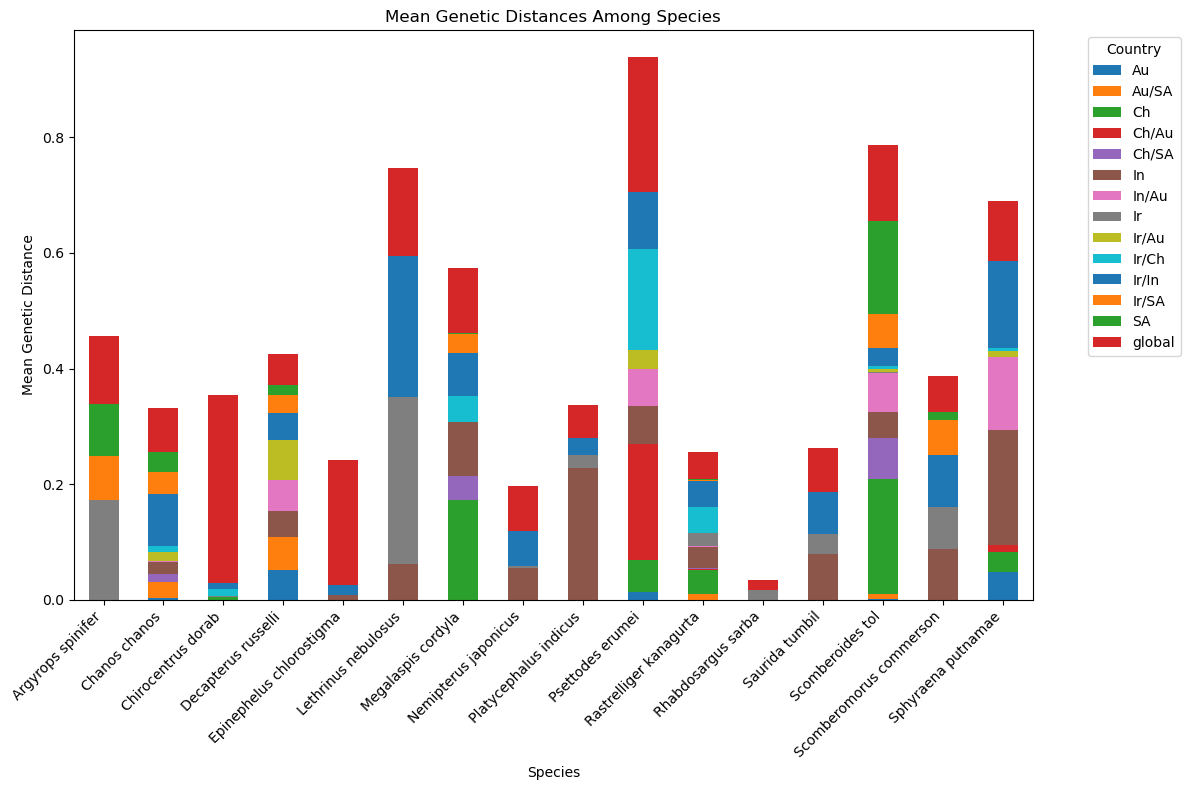

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "/Users/pujabajracharya/Desktop/Final_project/genetic_dist.xlsx"
df = pd.read_excel(file_path)

# Check the data types of the columns
print(df.dtypes)

# Pivot the dataframe to have countries as columns
pivot_df = df.pivot(index='Species', columns='Country', values='Mean')

# Plotting
plt.figure(figsize=(12, 8))

# Create the bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Customize the plot
plt.title('Mean Genetic Distances Among Species')
plt.xlabel('Species')
plt.ylabel('Mean Genetic Distance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()





/var/folders/vw/z7n6b0t51_50cw0d8jj1tt9c0000gn/T/ipykernel_1564/268235593.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


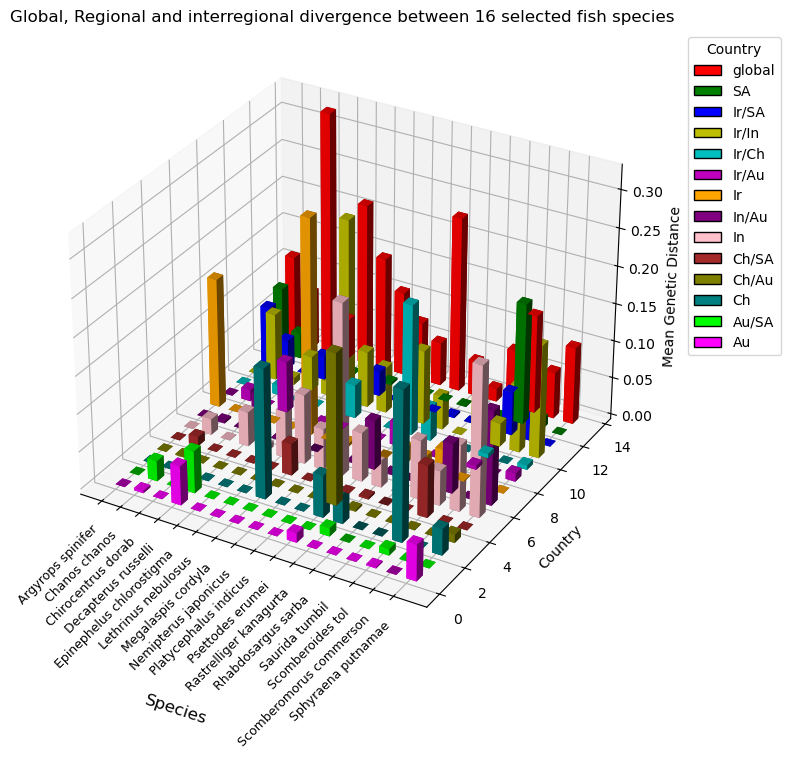

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

# Load the Excel file
file_path = "/Users/pujabajracharya/Desktop/Final_project/genetic_dist.xlsx"
df = pd.read_excel(file_path)

# Pivot the dataframe to have countries as columns
pivot_df = df.pivot(index='Species', columns='Country', values='Mean')

# Plotting in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each country
colors = {'global': 'r', 'SA': 'g', 'Ir/SA': 'b', 'Ir/In': 'y', 'Ir/Ch': 'c', 'Ir/Au': 'm', 'Ir': 'orange', 
          'In/Au': 'purple', 'In': 'pink', 'Ch/SA': 'brown', 'Ch/Au': 'olive', 'Ch': 'teal', 'Au/SA': 'lime', 'Au': 'magenta'}

# Create bars for each species
legend_handles = [Patch(facecolor=color, edgecolor='black', label=label) for label, color in colors.items()]
for i, (species, row) in enumerate(pivot_df.iterrows()):
    xpos = i
    ypos = range(len(row))
    zpos = [0] * len(row)
    dx = 0.5
    dy = 0.5
    dz = row.values
    color = [colors[col] for col in row.index]
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color)

# Customize the plot
ax.set_xlabel('Species', fontsize=12, labelpad=60)  # Adjust fontsize and labelpad as needed
ax.set_ylabel('Country')
ax.set_zlabel('Mean Genetic Distance')
ax.set_xticks(range(len(pivot_df)))
ax.set_xticklabels(pivot_df.index, rotation=45, ha='right', fontsize=9, rotation_mode='anchor')  # Adjust rotation and spacing

# Create legend with custom handles and labels
ax.legend(handles=legend_handles, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.title('Global, Regional and interregional divergence between 16 selected fish species')
plt.tight_layout()

# Save the plot with extended bounding box to include the legend
plt.savefig('plot_with_legend.png', bbox_inches='tight')
plt.show()
